para crear y modificar los gráficos más fácilmente


modifiqué la función análisis compacto (davs) agregando un parámetro 'neg' para que al analizar la señal negativa,
tomé los pasos por el cero con derivada positiva, para eso modifiqué la otra función y creé `detectar_cruces_cero_positivos(tiempos, señal):`

Falta agregar un parámetro para decir si medimos con la pendiente creciente o decreciente, para ver si invertimos la señal o no. No se me ocurrió antes porque siempre medimos con la misma peniente en la 1er y 2da clase, pero en esta como se movía medimos algunas con pendiente negativa


También agrego en análisis compacto una línea para elejir el canal a analizar, `canal`, `1` si es el canal uno y `2` para el 2.
y agrego que devuelva los tiempos para poder ver el desfasaje entre las dos polarizaciones

#ah, el filtro capaz baja el máximo, entonces vuelvo a normalizar después de eso


redefino lo de graficar_6_subplots para la davs, y lo cambio dentro de análisis_compacto_davs
también agrego que devuelva la lista de tiempos

In [1]:
import numpy as np
import pandas as pd
import math
import time
import pyvisa
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os
from scipy.signal import savgol_filter
from scipy.signal import find_peaks


In [54]:

def guardar_mediciones():
    # Mediciones_CH1.csv
    df_1 = pd.DataFrame([freq_gen_fun, Unidades_señales_CH1])
    df_1nuevo = pd.DataFrame(señales_CH1).T
    df_mediciones_CH1 = pd.concat([df_1, df_1nuevo], ignore_index=True)
    titulos_filas = ["frecuencias generador funciones (Hz)", "Unidades señales CH1", "Señales CH1"]
    while len(titulos_filas) < len(df_mediciones_CH1):
        titulos_filas.append("")
    df_mediciones_CH1.insert(0, "Títulos de Fila", titulos_filas)
    df_mediciones_CH1.to_csv(r'C:.\Mediciones_CH1.csv', index=False, encoding = 'utf-8')
    time.sleep(0.5)

    # Mediciones_CH2.csv
    df_2 = pd.DataFrame([freq_gen_fun, Unidades_señales_CH2])
    df_2nuevo = pd.DataFrame(señales_CH2).T
    df_mediciones_CH2 = pd.concat([df_2, df_2nuevo], ignore_index=True)
    titulos_filas_2 = ["frecuencias generador funciones (Hz)", "Unidades señales CH2", "Señales CH2"]
    while len(titulos_filas_2) < len(df_mediciones_CH2):
        titulos_filas_2.append("")
    df_mediciones_CH2.insert(0, "Títulos de Fila", titulos_filas_2)
    df_mediciones_CH2.to_csv(r'C:.\Mediciones_CH2.csv', index=False, encoding = 'utf-8')
    time.sleep(0.5)

    #Unidades y escala.csv
    df_unidades_y_escala = pd.DataFrame([freq_gen_fun, Unidades_señales_CH1, Unidades_tiempos_CH1, Escala_señales_CH1, Escala_tiempos_CH1, Unidades_señales_CH2, Unidades_tiempos_CH2, Escala_señales_CH2, Escala_tiempos_CH2 ])
    titulos_filas_3 = ["frecuencias generador funciones (Hz)", "Unidades señales Ch1", "Unidades tiempos Ch1", "Escala señales Ch1 (V)", "Escala Tiempos Ch1 (s)", "Unidades señales Ch2", "Unidades tiempos Ch2", "Escala señales Ch2 (V)", "Escala Tiempos Ch2 (s)"]
    df_unidades_y_escala.insert(0, "Títulos de Fila", titulos_filas_3)
    df_unidades_y_escala.to_csv(r'C:.\Unidades y escala.csv', index=False, encoding = 'utf-8')
    time.sleep(0.5)

    #Tiempos_CH1.csv
    df_t1 = pd.DataFrame([freq_gen_fun, Unidades_tiempos_CH1])
    df_t1nuevo = pd.DataFrame(tiempos_CH1).T
    df_tiempos_CH1 = pd.concat([df_t1, df_t1nuevo], ignore_index=True)
    titulos_filas_4 = ["frecuencias generador funciones (Hz)", "Unidades tiempos CH1", "Tiempos CH1"]
    while len(titulos_filas_4) < len(df_tiempos_CH1):
        titulos_filas_4.append("")
    df_tiempos_CH1.insert(0, "Títulos de Fila", titulos_filas_4)
    df_tiempos_CH1.to_csv(r'C:.\Tiempos_CH1.csv', index=False, encoding = 'utf-8')
    time.sleep(0.5)

    #Tiempos_CH2.csv
    df_t2 = pd.DataFrame([freq_gen_fun, Unidades_tiempos_CH2])
    df_t2nuevo = pd.DataFrame(tiempos_CH2).T
    df_tiempos_CH2 = pd.concat([df_t2, df_t2nuevo], ignore_index=True)
    titulos_filas_5 = ["frecuencias generador funciones (Hz)", "Unidades tiempos CH2", "Tiempos CH2"]
    while len(titulos_filas_5) < len(df_tiempos_CH2):
        titulos_filas_5.append("")
    df_tiempos_CH2.insert(0, "Títulos de Fila", titulos_filas_5)
    df_tiempos_CH2.to_csv(r'C:.\Tiempos_CH2.csv', index=False, encoding = 'utf-8')
    time.sleep(0.5)

    print("Archivos guardados correctamente")




def cargar_datos_2(n, i, ruta, a):
    
    #n número de datos tomados +1
    # i número de medición -1 (empezando a contar desde 1)
    # sufijo para cada medición distinta

    columnas = [f'{j}' for j in range(1, n)]

    # Rutas a archivos
    señales_Ch1 = os.path.join(ruta, 'Mediciones_CH1.csv')
    señales_Ch2 = os.path.join(ruta, 'Mediciones_CH2.csv')
    tiempos_Ch1 = os.path.join(ruta, 'Tiempos_CH1.csv')
    tiempos_Ch2 = os.path.join(ruta, 'Tiempos_CH2.csv')
    unidades_escalas = os.path.join(ruta, 'Unidades y escala.csv')

    # Lectura de archivos
    data_señales_Ch1 = pd.read_csv(señales_Ch1, skiprows=3, delimiter=',', header=None, names=columnas)
    data_señales_Ch2 = pd.read_csv(señales_Ch2, skiprows=3, delimiter=',', header=None, names=columnas)
    data_tiempos_Ch1 = pd.read_csv(tiempos_Ch1, skiprows=3, delimiter=',', header=None, names=columnas)
    data_tiempos_Ch2 = pd.read_csv(tiempos_Ch2, skiprows=3, delimiter=',', header=None, names=columnas)
    data_unidades_escalas = pd.read_csv(unidades_escalas, delimiter=',', header=None, names=columnas)

    # Selección de columna
    col_name = str(i + 1)

    # Variables con sufijo personalizado
    globals()[f'tiempos1_{a}'] = data_tiempos_Ch1[col_name].values
    globals()[f'voltajes1_{a}'] = data_señales_Ch1[col_name].values

    globals()[f'tiempos2_{a}'] = data_tiempos_Ch2[col_name].values
    globals()[f'voltajes2_{a}'] = data_señales_Ch2[col_name].values

    escala_Ch1 = float(data_unidades_escalas[col_name].iloc[4])
    escala_Ch2 = float(data_unidades_escalas[col_name].iloc[8])

    globals()[f'error_Ch1_{a}'] = escala_Ch1 * 10 / 256
    globals()[f'error_Ch2_{a}'] = escala_Ch2 * 10 / 256


def lineal(x, m, b):
  y =  m * x + b
  return y


def detectar_cruces_cero_negativos(tiempos, señal):
    cruces = []

    for i in range(len(señal) - 1):
        y1, y2 = señal[i], señal[i + 1]
        if y1 > 0 and y2 < 0:  # Cruce por cero con pendiente negativa
            t1, t2 = tiempos[i], tiempos[i + 1]
            # Interpolación lineal para encontrar el tiempo exacto del cruce
            t_cruce = t1 - y1 * (t2 - t1) / (y2 - y1)
            cruces.append(t_cruce)

    return np.array(cruces)


def graficar_6_subplots_davs(x1, y1, x2, y2, x3, y3, x4, y4, x5, y5, x6, y6, zeros): #ahora en vez de peaks tengo zeros
    fig, axs = plt.subplots(3, 2, figsize=(10, 9))  # 3 filas, 2 columnas

    # Gráfico 1
    axs[0, 0].plot(x1, y1, '.', color='darkcyan', label='Canal 1')
    axs[0, 0].set_title("señal osciloscopio")
    axs[0, 0].set_xlabel("tiempo [s]")
    axs[0, 0].set_ylabel("v")

    # Gráfico 2
    axs[0, 1].plot(x2, y2, ".", color='darkslategray')
    axs[0, 1].set_title("recorte lineal")
    axs[0, 1].set_xlabel("tiempo [s]")
    axs[0, 1].set_ylabel("v")

    # Gráfico 3
    axs[1, 0].plot(x3, y3, ".", markersize=2, color='darkslategray')
    axs[1, 0].set_title("aplanado")
    axs[1, 0].set_xlabel("tiempo [s]")
    axs[1, 0].set_ylabel("davs")

    # Gráfico 4
    axs[1, 1].plot(x4, y4, ".", markersize=2, color='darkslategray')
    axs[1, 1].set_title("normalizado y suavizado")
    axs[1, 1].set_xlabel("tiempo [s]")
    axs[1, 1].set_ylabel("davs")

    # Gráfico 5
    axs[2, 0].plot(x5, y5, label="señal")
    axs[2, 0].plot(zeros, np.zeros_like(zeros), "rx",label="raíces detectadas")

    axs[2, 0].set_title("ceros")
    axs[2, 0].set_xlabel("tiempo [s]")
    axs[2, 0].set_ylabel("Davs")
    axs[2, 0].legend()  # <-- Mostrar leyenda sólo en el quinto gráfico

    # Gráfico 6
    axs[2, 1].plot(x6, y6, ".", markersize=2, color='teal')
    axs[2, 1].axvline(0 , color="darkslategray", linestyle="dashed") # para ver que haya tomado los ceros que queremos
    axs[2, 1].axvline(7.649, color="darkslategray", linestyle="dashed") # para ver que haya tomado los ceros que queremos
    axs[2, 1].set_title("reescalado")
    axs[2, 1].set_xlabel("Frecuencia relativa (Ghz)")
    axs[2, 1].set_ylabel("Davs")

    plt.tight_layout()
    plt.show()



def detectar_cruces_cero_positivos(tiempos, señal):
    cruces = []

    for i in range(len(señal) - 1):
        y1, y2 = señal[i], señal[i + 1]
        if y1 < 0 and y2 > 0:  # Cruce por cero con pendiente negativa
            t1, t2 = tiempos[i], tiempos[i + 1]
            # Interpolación lineal para encontrar el tiempo exacto del cruce
            t_cruce = t1 - y1 * (t2 - t1) / (y2 - y1)
            cruces.append(t_cruce)

    return np.array(cruces)





def graficar_6_subplots(x1, y1, x2, y2, x3, y3, x4, y4, x5, y5, x6, y6, peaks): #tengo que agregar peaks para poder usarlo dentro de la función
    fig, axs = plt.subplots(3, 2, figsize=(10, 9))  # 3 filas, 2 columnas

    # Gráfico 1
    axs[0, 0].plot(x1, y1, '.', color='darkcyan', label='Canal 1')
    axs[0, 0].set_title("señal osciloscopio")
    axs[0, 0].set_xlabel("tiempo [s]")
    axs[0, 0].set_ylabel("v")

    # Gráfico 2
    axs[0, 1].plot(x2, y2, ".", color='darkslategray')
    axs[0, 1].set_title("recorte lineal")
    axs[0, 1].set_xlabel("tiempo [s]")
    axs[0, 1].set_ylabel("v")

    # Gráfico 3
    axs[1, 0].plot(x3, y3, ".", markersize=2, color='darkslategray')
    axs[1, 0].set_title("aplanado")
    axs[1, 0].set_xlabel("tiempo [s]")
    axs[1, 0].set_ylabel("Absorción [a.u.]")

    # Gráfico 4
    axs[1, 1].plot(x4, y4, ".", markersize=2, color='darkslategray')
    axs[1, 1].set_title("normalizado e invertido")
    axs[1, 1].set_xlabel("tiempo [s]")
    axs[1, 1].set_ylabel("Absorción [a.u.]")

    # Gráfico 5
    axs[2, 0].plot(x5, y5, label="señal")
    axs[2, 0].plot(x5[peaks], y5[peaks], "rx",label="picos detectados")

    axs[2, 0].set_title("picos")
    axs[2, 0].set_xlabel("tiempo [s]")
    axs[2, 0].set_ylabel("Absorción [a.u.]")
    axs[2, 0].legend()  # <-- Mostrar leyenda sólo en el quinto gráfico

    # Gráfico 6
    axs[2, 1].plot(x6, y6, ".", markersize=2, color='teal')
    axs[2, 1].set_title("reescalado")
    axs[2, 1].set_xlabel("Frecuencia relativa (Ghz)")
    axs[2, 1].set_ylabel("Absorción [a.u.]")

    plt.tight_layout()
    plt.show()


def análisis_compacto_davs(n, i, a, ruta, A, B, C, D, graficar=True, norm=True, neg = False,l = 0, m = -1):

        cargar_datos_2(n = n, i = i, ruta=ruta, a = 'a')

        #uso los dos extremos de la parte lineal para ajustar

        voltajes_intervalos_a = np.concatenate([voltajes1_a[A:B], voltajes1_a[C:D]])
        tiempos_intervalos_a = np.concatenate([tiempos1_a[A:B], tiempos1_a[C:D]])

        #Cuando se vea la recta, hago el ajuste:

        x_fit_a =  np.linspace(np.min(tiempos2_a), np.max(tiempos2_a), len(tiempos2_a), endpoint = True)

        param_iniciales = [0.01, 0]
        popt_0, pcov_0 = curve_fit(lineal, tiempos_intervalos_a,voltajes_intervalos_a, p0=param_iniciales, sigma = error_Ch1_a*np.ones(len(tiempos_intervalos_a)), absolute_sigma=True)
        incertidumbre_0 = np.sqrt(np.diag(pcov_0))

        tabla = pd.DataFrame({
                'Los parametros óptimos son': popt_0,
                'Los errores de los parámetros son': incertidumbre_0,
                })
        if graficar:#así oculto estas salidas
                print(tabla)


        t_espectro_a = tiempos1_a[B:C] #así ya está recortado
        espectro_a = (voltajes1_a - lineal(x_fit_a, *popt_0))[B:C] 

        #inertimos, para graficar la absorción en función del tiempo
        #Y normalizamos para que el pico de mayor amplitud valga 1
        #Además, hacemos que la señal sea toda positiva (así al comparar están todas en la misma escala vertical)
        
        #espectro_a_inv = espectro_a * (-1)
        #espectro_a_pos = espectro_a_inv - np.min(espectro_a_inv) # con el - me aseguro de si ya es toda positiva, que se baje el minimo al cero
        
        #normalizamos
        espectro_a_norm = espectro_a / np.max(espectro_a)

        #filtrado
        señal_suavizada_a = savgol_filter(espectro_a_norm, window_length=11, polyorder=2)
  
        #damos vuelta el espectro
        
        #espectro_suave_a = señal_suavizada_a[::-1]
        espectro_suave_a = señal_suavizada_a

        #encuentro el primer y último cero

        zeros = detectar_cruces_cero_negativos(t_espectro_a, espectro_suave_a)


        if neg:
             zeros = detectar_cruces_cero_positivos(t_espectro_a, espectro_suave_a)

        
        first_zero, last_zero = zeros[l], zeros[m] 
        #en general l = 0 y m = -1, peero si llega a detectar otros,
        #para poder ajustarlo y que no se reescalee mal


        # obtener primer y último cero
        x_first, x_last = first_zero, last_zero


        if graficar:#así oculto estas salidas
                print("Primer cero:", first_zero)
                print("Último cero:", last_zero)


        # reescaleo los tiempos a las frecuencias 
        # Fórmula de reescalado
        frecuencias_abs = [377.104391, 377.112040] #THz
        frecuencias_rel = [0, 7.649] #Ghz

        freq_relativas = (t_espectro_a - x_first) / (x_last - x_first) * (7.649 - 0) + 0 # le pongo el cero por si lo quiero cambiar después
        freq_absolutas = (t_espectro_a - x_first) / (x_last - x_first) * (frecuencias_abs[1] - frecuencias_abs[0]) + frecuencias_abs[0]


        if norm:
                espectro_suave_a = espectro_suave_a
        else:
                espectro_suave_a = espectro_suave_a * np.max(espectro_a)




        #grafico (sólo si graficar = True)
        if graficar:
                graficar_6_subplots_davs(tiempos1_a, voltajes1_a, tiempos_intervalos_a, voltajes_intervalos_a, t_espectro_a, espectro_a, t_espectro_a, señal_suavizada_a, t_espectro_a, espectro_suave_a, freq_relativas, espectro_suave_a, zeros=zeros)


        #creo las variables globales

        globals()[f'espectro_suave_{a}'] = espectro_suave_a
        globals()[f'f_rel_{a}'] = freq_relativas
        globals()[f'f_abs_{a}'] = freq_absolutas

        globals()[f't_espectro_{a}'] = t_espectro_a

        globals()[f'zero_{a}'] = zeros

        #para ver el desplazamiento en función de la temperatura del láser
        #globals()[f't_raw_{a}'] = tiempos1_a
        #globals()[f'v_raw_{a}'] = voltajes1_a

        #para ver la amplitud relativa entre las señales, exporto la señal antes de normalizarla
        #señal_suavizada_a_sin_norm = savgol_filter(espectro_a_pos, window_length=11, polyorder=2) # la filtro
        #globals()[f'espectro_sin_norm_{a}'] = señal_suavizada_a_sin_norm


def análisis_compacto(n, i, a, ruta, A, B, C, D, h, dis, pro, graficar=True, norm=True, canal = 1):

        cargar_datos_2(n = n, i = i, ruta=ruta, a = 'a')


        #para analizar el canal 2
        if canal == 2:
                voltajes1_a = globals()[f'voltajes2_a']
                tiempos1_a = globals()[f'tiempos2_a'] #esto es redundate porque los tiempos son iguales
                error_Ch1_a = globals()[f'error_Ch2_a']
        else:
                voltajes1_a = globals()[f'voltajes1_a']
                tiempos1_a = globals()[f'tiempos1_a']
                error_Ch1_a = globals()[f'error_Ch1_a']




        #uso los dos extremos de la parte lineal para ajustar

        voltajes_intervalos_a = np.concatenate([voltajes1_a[A:B], voltajes1_a[C:D]])
        tiempos_intervalos_a = np.concatenate([tiempos1_a[A:B], tiempos1_a[C:D]])

        #Cuando se vea la recta, hago el ajuste:

        x_fit_a =  np.linspace(np.min(tiempos2_a), np.max(tiempos2_a), len(tiempos2_a), endpoint = True)

        param_iniciales = [0.01, 0]
        popt_0, pcov_0 = curve_fit(lineal, tiempos_intervalos_a,voltajes_intervalos_a, p0=param_iniciales, sigma = error_Ch1_a, absolute_sigma=True)
        incertidumbre_0 = np.sqrt(np.diag(pcov_0))

        tabla = pd.DataFrame({
                'Los parametros óptimos son': popt_0,
                'Los errores de los parámetros son': incertidumbre_0,
                })
        if graficar:#así oculto estas salidas
                print(tabla)


        t_espectro_a = tiempos1_a[B:C] #así ya está recortado
        espectro_a = (voltajes1_a - lineal(x_fit_a, *popt_0))[B:C] 

        #inertimos, para graficar la absorción en función del tiempo
        #Y normalizamos para que el pico de mayor amplitud valga 1
        #Además, hacemos que la señal sea toda positiva (así al comparar están todas en la misma escala vertical)
        espectro_a_inv = espectro_a * (-1)
        espectro_a_pos = espectro_a_inv - np.min(espectro_a_inv) # con el - me aseguro de si ya es toda positiva, que se baje el minimo al cero
        
        #normalizamos
        espectro_a_norm = espectro_a_pos / np.max(espectro_a_pos)

        #filtrado
        señal_suavizada_a = savgol_filter(espectro_a_norm, window_length=11, polyorder=2)

        #ah, el filtro capaz baja el máximo, entonces vuelvo a normalizar
        señal_suavizada_a = señal_suavizada_a / np.max(señal_suavizada_a)
  
        #damos vuelta el espectro
        espectro_suave_a = señal_suavizada_a[::-1]


        #encuentro el primer y último pico

        peaks, props = find_peaks(
        espectro_suave_a,
        height= h,        # altura mínima del pico
        distance= dis,      # distancia mínima en puntos entre picos
        prominence= pro    # "prominencia" mínima (cuán destacado es el pico)
        )

        # obtener primer y último pico real
        x_first, x_last = t_espectro_a[peaks][0], t_espectro_a[peaks][-1]
        
        if graficar:#así oculto estas salidas
                print("Primer pico:", x_first)
                print("Último pico:", x_last)


        # reescaleo los tiempos a las frecuencias 
        # Fórmula de reescalado
        frecuencias_abs = [377.104391, 377.112040] #THz
        frecuencias_rel = [0, 7.649] #Ghz

        freq_relativas = (t_espectro_a - x_first) / (x_last - x_first) * (7.649 - 0) + 0 # le pongo el cero por si lo quiero cambiar después
        freq_absolutas = (t_espectro_a - x_first) / (x_last - x_first) * (frecuencias_abs[1] - frecuencias_abs[0]) + frecuencias_abs[0]


        if norm:
                espectro_suave_a = espectro_suave_a
        else:
                espectro_suave_a = espectro_suave_a * np.max(espectro_a_pos)




        #grafico (sólo si graficar = True)
        if graficar:
                graficar_6_subplots(tiempos1_a, voltajes1_a, tiempos_intervalos_a, voltajes_intervalos_a, t_espectro_a, espectro_a, t_espectro_a, señal_suavizada_a, t_espectro_a, espectro_suave_a, freq_relativas, espectro_suave_a, peaks = peaks)


        #creo las variables globales

        globals()[f'espectro_suave_{a}'] = espectro_suave_a
        globals()[f'f_rel_{a}'] = freq_relativas
        globals()[f'f_abs_{a}'] = freq_absolutas

        globals()[f't_espectro_{a}'] = t_espectro_a


        #para ver el desplazamiento en función de la temperatura del láser
        #globals()[f't_raw_{a}'] = tiempos1_a
        #globals()[f'v_raw_{a}'] = voltajes1_a

        #para ver la amplitud relativa entre las señales, exporto la señal antes de normalizarla
        #señal_suavizada_a_sin_norm = savgol_filter(espectro_a_pos, window_length=11, polyorder=2) # la filtro
        #globals()[f'espectro_sin_norm_{a}'] = señal_suavizada_a_sin_norm



# Espectro

   Los parametros óptimos son  Los errores de los parámetros son
0                   72.728123                           0.074081
1                  -13.503824                           0.013921
Primer pico: 0.187947
Último pico: 0.188708


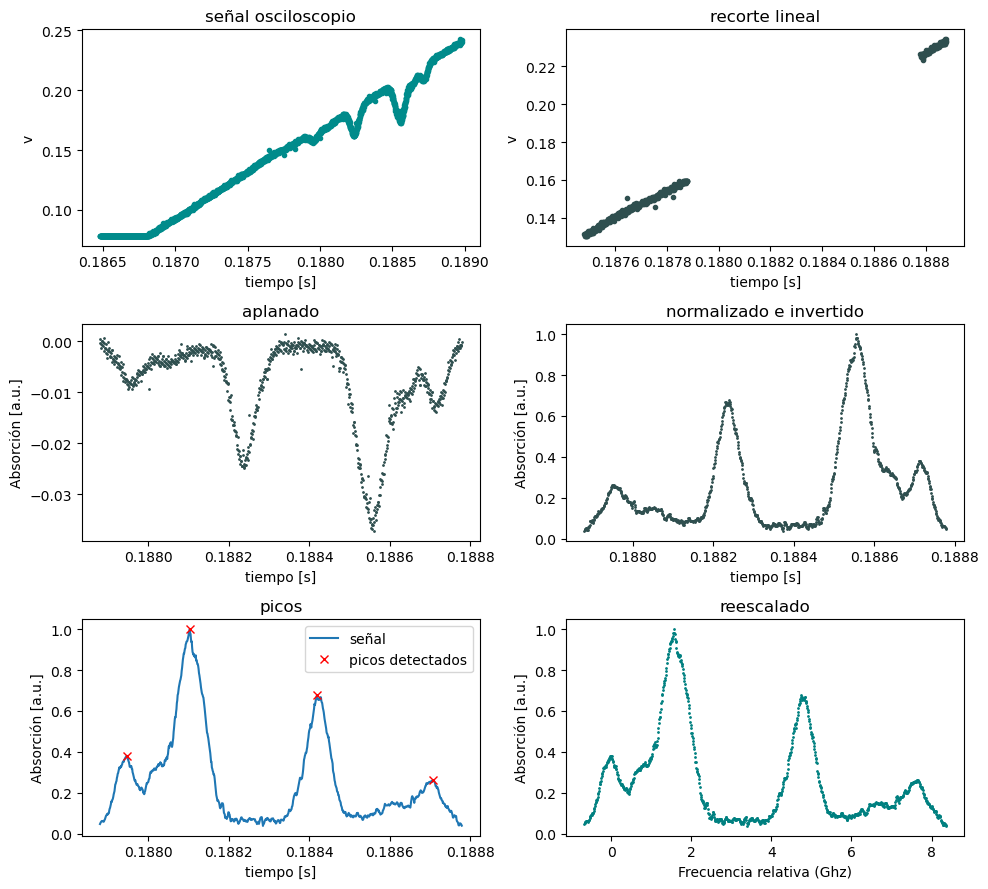

In [3]:
análisis_compacto(n=2, i=0, a = 'a', ruta='/Users/Mauri/Desktop/Labo 5/Espectroscopía láser/Med1', A =1000
                  , B = 1400, C = 2300, D = 2400, h = 0.2, dis = 100, pro = 0.05, graficar=True,  norm=True)


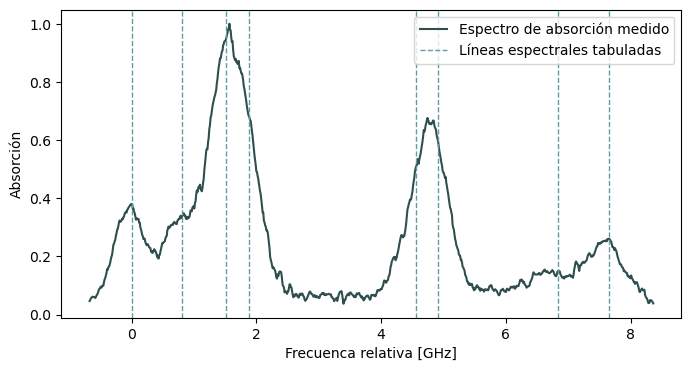

In [8]:
# primeras y últimas frecuencias relativas y absolutas (Rb87 y Rb85)

freqs = [0, 0.814, 1.518, 1.883, 4.556, 4.916, 6.835, 7.649]

fig = plt.figure(figsize=(8, 4))

plt.plot(f_rel_a, espectro_suave_a, "-", markersize=2, color = 'darkslategray', label = 'Espectro de absorción medido')

plt.xlabel('Frecuenca relativa [GHz]')
plt.ylabel('Absorción')

for i in range(len(freqs)):
    if i == 0:
        plt.axvline(x=freqs[i] , color='cadetblue', linestyle='--', linewidth=1, label = 'Líneas espectrales tabuladas' )
    else:
        plt.axvline(x=freqs[i] , color='cadetblue', linestyle='--', linewidth=1)

plt.legend(loc="upper right")
plt.show()


# pol+, pol- y davs

In [59]:
análisis_compacto(n=4, i=2, a = 'izq', ruta='/Users/Mauri/Desktop/Labo 5/Espectroscopía láser/Med_comparación', A =600
                  , B = 700, C = 1900, D = 2000, h = 0.2, dis = 100, pro = 0.05, graficar=False,  norm=True, canal = 1)


In [58]:
análisis_compacto(n=4, i=2, a = 'der', ruta='/Users/Mauri/Desktop/Labo 5/Espectroscopía láser/Med_comparación', A =600
                  , B = 800, C = 2000, D = 2100, h = 0.2, dis = 50, pro = 0.05, graficar=False,  norm=True, canal = 2)


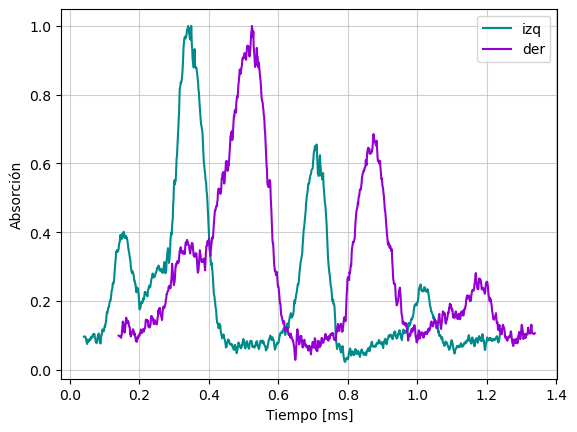

In [60]:
plt.plot(t_espectro_izq * 1000 + 1.2, espectro_suave_izq,'-', color = 'darkcyan', label= 'izq')
plt.plot(t_espectro_der * 1000 + 1.2, espectro_suave_der, '-', color ='darkviolet', label= 'der')
plt.xlabel('Tiempo [ms]')
plt.ylabel('Absorción')
plt.legend(loc="upper right") # bbox_to_anchor=(1, 1))
#plt.xlim(-0.0015,-00.0016)
plt.grid(alpha = 0.6)
plt.show()

In [ ]:
cargar_datos_2(n=4, i=1, ruta='/Users/Mauri/Desktop/Labo 5/Espectroscopía láser/Med_comparación', a = 'a')

# Graficamos ambos canales.
plt.plot(tiempos1_a, voltajes1_a,'.', color = 'darkcyan', label= 'Canal 1')
plt.plot(tiempos2_a, voltajes2_a, '.', color ='gray', label= 'Canal 2')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (V)')
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
#plt.xlim(-0.0015,-00.0016)
plt.grid(alpha = 0.6)
plt.show()

In [45]:
# señal davs asociada

análisis_compacto_davs(n=4, i=0, a = 'davs', ruta='/Users/Mauri/Desktop/Labo 5/Espectroscopía láser/Med_comparación', A =500
                  , B = 1000, C = 1900, D = 2400, graficar=False,  norm=True, l = 0, m = -3)

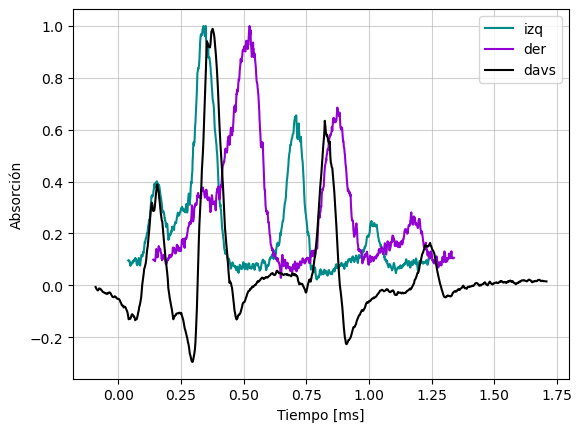

In [57]:
plt.plot(t_espectro_izq * 1000 + 1.2, espectro_suave_izq,'-', color = 'darkcyan', label= 'izq')
plt.plot(t_espectro_der * 1000 + 1.2, espectro_suave_der, '-', color ='darkviolet', label= 'der')
plt.plot(t_espectro_davs * 1000 - 4.2, espectro_suave_davs, '-', color ='black', label= 'davs')

plt.xlabel('Tiempo [ms]')
plt.ylabel('Absorción')
plt.legend(loc="upper right") # bbox_to_anchor=(1, 1))
#plt.xlim(-0.0015,-00.0016)
plt.grid(alpha = 0.6)
plt.show()

# Variación c. magnético

   Los parametros óptimos son  Los errores de los parámetros son
0                  -34.328807                           0.061906
1                    0.125701                           0.000111
Primer cero: -0.0001448366800362492
Último cero: 0.0010201429222393543


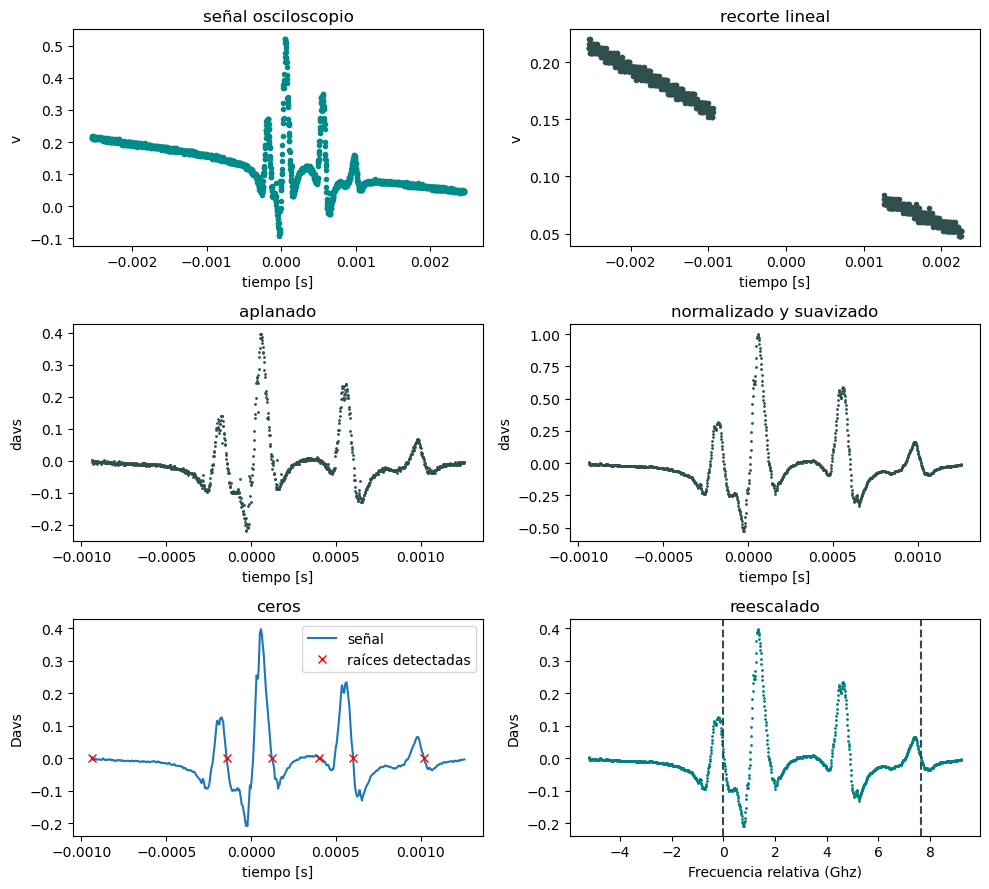

In [57]:
análisis_compacto_davs(n=11, i=0, a = '11', ruta='./Variación_B/', A =0
                  , B = 800, C = 1900, D = 2400, graficar=True,  norm=False, l = 1, m = -1)

In [39]:
análisis_compacto_davs(n=11, i=1, a = '15', ruta='./Variación_B/', A =200
                  , B = 800, C = 1900, D = 2400, graficar=False,  norm=False, l = 4, m = -1)

In [40]:
análisis_compacto_davs(n=11, i=2, a = '21', ruta='./Variación_B/', A =200
                  , B = 800, C = 1900, D = 2400, graficar=False,  norm=False, l = 3, m = -5)

In [41]:
análisis_compacto_davs(n=11, i=3, a = '19', ruta='./Variación_B/', A =200
                  , B = 800, C = 1900, D = 2400, graficar=False,  norm=False, l = 7, m = -6)

In [42]:
análisis_compacto_davs(n=11, i=4, a = '17', ruta='./Variación_B/', A =200
                  , B = 800, C = 1900, D = 2400, graficar=False,  norm=False, l = 0, m = -7)

In [43]:

análisis_compacto_davs(n=11, i=6, a = '13', ruta='./Variación_B/', A =200
                  , B = 800, C = 1900, D = 2400, graficar=False,  norm=False, l = 1, m = -1)


In [44]:

análisis_compacto_davs(n=11, i=8, a = '11neg', ruta='./Variación_B/', A =0
                  , B = 300, C = 1900, D = 2400, graficar=False,  norm=False, neg=True, l = 26, m = -1)

In [45]:

análisis_compacto_davs(n=11, i=9, a = '15neg', ruta='./Variación_B/', A =100
                  , B = 800, C = 2200, D = 2800, graficar=False,  norm=False, neg = True, l = 5, m = -1)

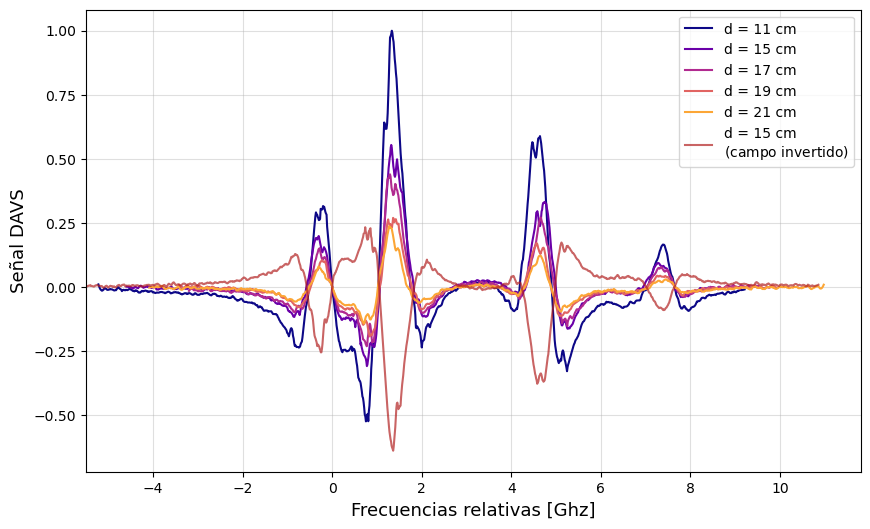

In [80]:


#%%Graficamos juntos




dominios = [f_rel_11,  f_rel_15, f_rel_17, f_rel_19, f_rel_21, f_rel_15neg]
imagenes = [espectro_suave_11, espectro_suave_15, espectro_suave_17, espectro_suave_19, espectro_suave_21, espectro_suave_15neg]

distancias = [11, 15, 17, 19, 21, "15neg"]  #cm distancia entre los imanes


#para ver las amplitudes relativas entre cada medición, 
#usando las imágenes obtenidas con norm = False!
#normalizo por el espectro más grande
valor_maximo = max(np.max(arr) for arr in imagenes) #es el mayor valor de todos los arrays
imagenes = [arr / valor_maximo for arr in imagenes] # esto divide a cada array de la lista por el valor_maximo


# Usamos un colormap para generar colores automáticamente
colormap = plt.cm.plasma  # plasma, magma, viridis, inferno, etc.
num_senales = len(dominios)
colors = [colormap(i  / (num_senales - 1)) for i in range(num_senales)]

# Graficamos
plt.figure(figsize=(10, 6))

for i in range(num_senales -1):
    plt.plot(dominios[i], imagenes[i], color=colors[i], label=f"d = {distancias[i]} cm")

plt.plot(dominios[-1], imagenes[-1], color = "firebrick", alpha= 0.7, label= r'd = 15 cm ' + '\n' + r'$(\mathrm{campo\ invertido)}$')

#plt.title("Señal DAVS en función del c.m. aplicado")
plt.xlabel("Frecuencias relativas [Ghz]",  fontsize=13)
plt.ylabel("Señal DAVS",  fontsize=13)
plt.xlim( -5.5)
plt.legend()
plt.grid(True, alpha = 0.4)
plt.show()




In [81]:

def encontrar_ceros(x, y, intervalo):
    """
    Encuentra los ceros de una señal y en un dominio x dentro de un intervalo dado.

    Parámetros:
        x (array-like): Dominio de la señal.
        y (array-like): Valores de la señal.
        intervalo (tuple): (a, b) intervalo donde buscar ceros.

    Retorna:
        list: Lista con los ceros de la señal en el intervalo.
    """
    a, b = intervalo
    # Filtrar solo el intervalo de interés
    mask = (x >= a) & (x <= b)
    x_interval = x[mask]
    y_interval = y[mask]

    # Encontrar índices donde la señal cambia de signo
    zero_indices = np.where(np.diff(np.sign(y_interval)))[0]

    # Interpolación lineal para estimar el cruce por cero
    zeros = []
    for i in zero_indices:
        x0, x1 = x_interval[i], x_interval[i+1]
        y0, y1 = y_interval[i], y_interval[i+1]
        zero = x0 - y0 * (x1 - x0) / (y1 - y0)
        zeros.append(zero)

    return zeros

In [94]:
zeros = []

for i in range(len(dominios)):
    zeros.append(encontrar_ceros(dominios[i], imagenes[i], (4.6,6)))


print(zeros)




desv_std = np.std(zeros)  # Por defecto, es la desviación estándar poblacional
desv_std_muestral = np.std(zeros, ddof=1)
print(desv_std)
print(desv_std_muestral)


error_std = desv_std_muestral / np.sqrt(n)
print(error_std)

[[4.901425342986918], [4.993858121794318], [4.962458226286489], [4.885935286049894], [4.885452602995974], [4.978948178885112]]
0.044978897983056446
0.04927191407408727
0.020115174688628484


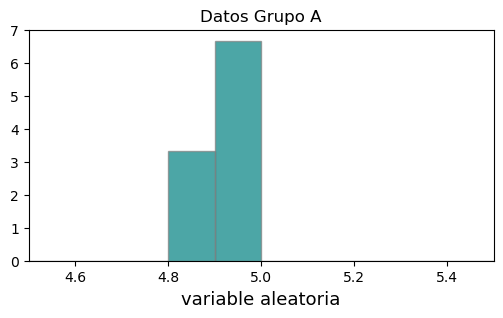

In [90]:
muestras = np.array(zeros)

n = len(muestras)

fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.hist(muestras, density=True, bins=np.arange(-0.5, n+1.5, 0.1), histtype='barstacked', alpha=0.7, color='teal', edgecolor='gray')
#ax.hist(muestras, density=True, bins=np.arange(-0.5, n+1.5, 1), histtype='barstacked', alpha=0.7, color='darkmagenta', edgecolor='indigo')
ax.set_title('Datos Grupo A')
ax.set_xlabel('variable aleatoria', fontsize=13)
#label = ax.set_ylabel('Densidad de\nprobabilidad', rotation=0, labelpad=55, fontsize=13)
#label.set_position((-0.1, 0.38))  # (x, y) en coordenadas relativas del eje
#ax.set_ylabel('Densidad de \nprobabilidad', rotation=0, labelpad=40)
ax.set_xlim(4.5, 5.5)
#ax.legend(title=f'$p_0$ = {p0_estimado:.4f} ± {sigma_p0:.4f}', loc='upper left', frameon=True)
plt.show()









# Davs sola

In [96]:
análisis_compacto_davs(n=11, i=0, a = 'davs_sola', ruta='./Variación_B/', A =0
                  , B = 900, C = 1900, D = 2400, graficar=False,  norm=True, l = 0, m = -1)

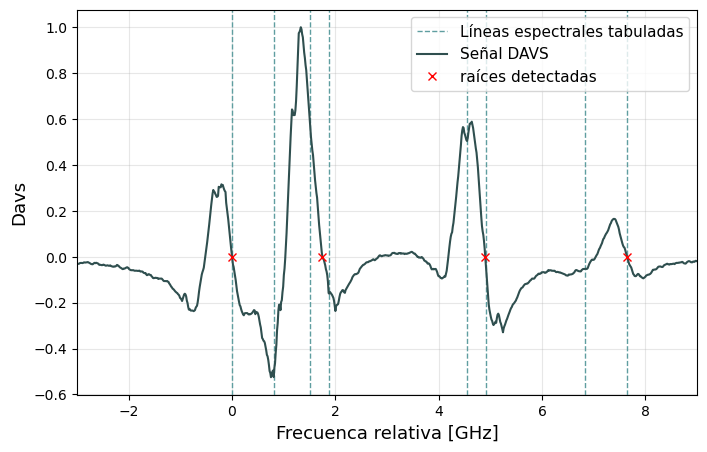

In [100]:

# primeras y últimas frecuencias relativas y absolutas (Rb87 y Rb85)

freqs = [0, 0.814, 1.518, 1.883, 4.556, 4.916, 6.835, 7.649]

#veo los ceros para graficarlos
zeros = detectar_cruces_cero_negativos(f_rel_davs_sola, espectro_suave_davs_sola)
#borro una raíz que no me interesa
zeros_new = np.delete(zeros, 2)
zeros = zeros_new


freqs = [0, 0.814, 1.518, 1.883, 4.556, 4.916, 6.835, 7.649]

plt.figure(figsize=(8, 5))



for i in range(len(freqs)):
    if i == 0:
        plt.axvline(x=freqs[i] , color='cadetblue', linestyle='--', linewidth=1, label = 'Líneas espectrales tabuladas' )
    else:
        plt.axvline(x=freqs[i] , color='cadetblue', linestyle='--', linewidth=1)




plt.plot(f_rel_davs_sola, espectro_suave_davs_sola, "-", markersize=2, color = 'darkslategray', label = 'Señal DAVS')

plt.plot(zeros, np.zeros_like(zeros), "rx", label="raíces detectadas")

plt.xlabel('Frecuenca relativa [GHz]', fontsize=13)
plt.ylabel('Davs', fontsize=13)
plt.xlim(-3, 9)
#for i in range(len(freqs)):
#    if i == 0:
#        plt.axvline(x=freqs[i] , color='cadetblue', linestyle='--', linewidth=1, label = 'Líneas espectrales tabuladas' )
#    else:
#        plt.axvline(x=freqs[i] , color='cadetblue', linestyle='--', linewidth=1)

plt.grid(alpha = 0.3)
plt.legend(fontsize=11)
plt.show()



# Ejemplo análisis

Tres figuras que muestren el proceso del análisis para el espectro, voy a modificar la función de análisis compacto para que devuelva tres gráficos en vez de seis.

Al final es mejor dos, una con la señal del osciloscopio y del ajuste lineal, y otra con un doble eje x, uno con los tiempos y otro con las frecuencias relativas.

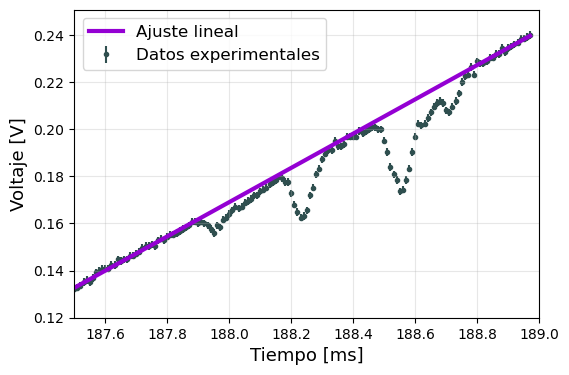

In [84]:


cargar_datos_2(n = 2, i = 0, ruta= '/Users/Mauri/Desktop/Labo 5/Espectroscopía láser/Med1', a = 'a')

N = 10

plt.figure(figsize=(6, 4))

tiempos1_a = tiempos1_a[::N]
voltajes1_a = voltajes1_a[::N]

error_Ch1_a = error_Ch1_a
#color = "darkslategray"
plt.errorbar((tiempos1_a*1000), voltajes1_a, yerr = (error_Ch1_a*2), fmt = ".", color = "darkslategray", label = "Datos experimentales", zorder=1)

x_fit = np.linspace((tiempos1_a*1000)[0], (tiempos1_a*1000)[-1], 1000)

plt.plot(x_fit, lineal(x_fit, 72.728123/1000, -13.503824), "-", linewidth=3,  color = 'darkviolet', markersize = 10, label = "Ajuste lineal", zorder=2)


#plt.plot(tiempos1_a, voltajes1_a, '.', color = 'darkcyan', label= 'Mediciones osciliscopio')
plt.xlabel('Tiempo [ms]', fontsize = 13)
plt.ylabel('Voltaje [V]', fontsize = 13)
plt.xlim(187.5, 189)
plt.ylim(0.12)
plt.legend(fontsize = 12)
plt.grid(alpha = 0.3)
plt.show()
